<a href="https://colab.research.google.com/github/felipesayegg/Previs-oA-oes_LSTM_RN/blob/main/RN_LSTM_Previs%C3%A3o_de_A%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




#1.  Introdução


# Previsão de Variação de Ações com Redes Neurais LSTM

O mercado financeiro é altamente volátil, com oscilações de preços que ocorrem de forma imprevisível devido a fatores como notícias econômicas, clima, política e comportamento coletivo dos investidores. Antecipar essas variações é um desafio complexo, mas essencial para analistas e investidores que desejam tomar decisões mais assertivas.

Este projeto tem como objetivo desenvolver um modelo de previsão de preços de ações utilizando uma **Rede Neural Recorrente do tipo LSTM (Long Short-Term Memory)**, uma técnica de Deep Learning especialmente eficaz na modelagem de séries temporais com padrões complexos, ruídos e comportamento não linear.

---

## Objetivo

Construir um pipeline completo de previsão de séries temporais financeiras com:

- Limpeza e tratamento de dados históricos
- Visualização e exploração dos padrões de variação
- Criação de variáveis derivadas como média móvel
- Normalização e estruturação dos dados para redes neurais
- Treinamento e validação de uma rede LSTM
- Avaliação com métricas de erro (MSE, RMSE, MAE)
- Discussão dos resultados e limitações

---

## Por que LSTM?

As **Redes Neurais Recorrentes (RNNs)** são modelos projetados para lidar com dados sequenciais, onde a ordem importa — como no caso de séries temporais. No entanto, RNNs tradicionais enfrentam dificuldades em reter informações por longos períodos devido ao problema do **desvanecimento ou explosão do gradiente**.

A **LSTM** foi criada para resolver esse problema. Ela possui uma arquitetura interna com **"portas de memória"** que controlam o fluxo de informação:

- **Porta de entrada**: decide quais informações entram na memória
- **Porta de esquecimento**: determina o que deve ser descartado
- **Porta de saída**: filtra o que será passado adiante para as próximas etapas

Isso permite que o modelo **"lembre" de eventos importantes mesmo após muitas etapas**, sendo ideal para séries com dependências temporais de longo prazo, como o comportamento dos preços de ações.

Além disso, a LSTM **não exige que os dados sejam estacionários**, e se adapta bem a **oscilações bruscas e ruídos**, sendo mais robusta que técnicas tradicionais como médias móveis ou regressões simples.

---

## Aplicação

Este projeto foi desenvolvido como parte da disciplina de Redes Neurais, com foco na aplicação prática de IA no contexto financeiro. No final, o modelo poderá ser adaptado para outras séries temporais, como previsão de vendas, demanda energética ou métricas de marketing digital.

A estrutura do notebook segue uma pipeline lógica e didática, facilitando o entendimento do processo completo — desde o tratamento dos dados até a análise final dos resultados preditivos.

In [4]:
# NumPy é o alicerce das operações matemáticas em Python.
# A gente usa ele para trabalhar com arrays, operações vetoriais e funções matemáticas mais rápidas e eficientes.
import numpy as np

# Pandas é o queridinho da análise de dados.
# Com ele, conseguimos organizar, limpar e explorar nossos dados em forma de tabelas (DataFrames).
import pandas as pd

# Matplotlib é a biblioteca clássica para criar gráficos em Python.
# Com ela, conseguimos visualizar tendências, padrões e anomalias de forma clara.
import matplotlib.pyplot as plt

# TensorFlow é um dos frameworks mais poderosos para criar modelos de Machine Learning e Deep Learning.
# Neste projeto, vamos usá-lo para construir e treinar a nossa rede neural LSTM.
import tensorflow as tf

# Scikit-learn (sklearn) é a caixa de ferramentas do cientista de dados.
# Aqui usaremos para normalizar dados, calcular métricas de erro e outras utilidades no pré e pós-modelo.
import sklearn


In [5]:
# Sequential é um tipo de modelo do TensorFlow onde empilhamos as camadas uma em cima da outra, de forma sequencial.
# É ideal quando queremos uma arquitetura simples e direta, como será o nosso caso com a LSTM.
from tensorflow.keras.models import Sequential

# Dense, Dropout e LSTM são camadas que usamos na construção do modelo.
# Dense: camada totalmente conectada, comum em redes neurais.
# Dropout: técnica para evitar overfitting, desligando neurônios aleatoriamente durante o treino.
# LSTM: a estrela do projeto! Camada especializada para lidar com dados sequenciais, como séries temporais.
from tensorflow.keras.layers import Dense, Dropout, LSTM

# MinMaxScaler serve para normalizar os dados antes de colocá-los na rede neural.
# A LSTM aprende melhor quando os dados estão em uma escala padronizada (geralmente entre 0 e 1).
from sklearn.preprocessing import MinMaxScaler

# Matplotlib é essencial para criar gráficos. Usamos o pyplot para visualizar os dados ao longo do tempo,
# as previsões do modelo e comparar resultados. Gráficos = insights visuais!
import matplotlib.pyplot as plt


In [6]:
np.__version__, pd.__version__, matplotlib.__version__, tf.__version__, sklearn.__version__

NameError: name 'matplotlib' is not defined

In [7]:
base = pd.read_csv('petr4_treinamento.csv')  # Importar os dados treinamento para variavels base
base

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [8]:
# Vamos dar uma olhada nas primeiras linhas para entender a estrutura da base.
base.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0


In [9]:
# Isso mostra os tipos de dados, se tem valores nulos, e quantas linhas/colunas existem.
base.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1245 non-null   object 
 1   Open       1242 non-null   float64
 2   High       1242 non-null   float64
 3   Low        1242 non-null   float64
 4   Close      1242 non-null   float64
 5   Adj Close  1242 non-null   float64
 6   Volume     1242 non-null   float64
dtypes: float64(6), object(1)
memory usage: 68.2+ KB


In [10]:
# Aqui conseguimos ver os valores médios, máximos, mínimos e distribuição geral.
base.describe()


,Open,High,Low,Close,Adj Close,Volume
count,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1.242000e+03
mean,14.041473,14.279831,13.785217,14.017415,13.699826,4.595294e+07
std,4.148311,4.186652,4.108178,4.146244,3.899735,3.235631e+07
min,4.200000,4.270000,4.120000,4.200000,4.191617,0.000000e+00
25%,10.510000,10.772500,10.210000,10.510000,10.489022,2.909925e+07
50%,14.545000,14.690000,14.220000,14.440000,14.209791,4.097120e+07
75%,17.187501,17.435001,16.870001,17.112501,16.383754,5.593528e+07
max,24.840000,24.900000,23.660000,24.559999,24.510979,6.989506e+08


In [11]:
base.isnull().sum()  # Vamos ver se existe algum valor ausente que precise ser tratado.

,0
Date,0
Open,3
High,3
Low,3
Close,3
Adj Close,3
Volume,3


In [12]:
base = base.dropna() # Ela remove todas as linhas da base de dados que contêm valores nulos (NaN).

In [13]:
base.shape  # mostrar quantas linhas e variaveis tem

(1242, 7)

In [14]:
base_treinamento = base.iloc[:, 1:2].values  # “Estou extraindo todos os valores da coluna de preço de abertura (Open) da minha base de dados, no formato de array NumPy 2D, para preparar o dado que vai ser alimentado na rede neural LSTM.

In [ ]:
base_treinamento

array([[19.99    ],
       [19.809999],
       [20.33    ],
       ...,
       [15.99    ],
       [16.1     ],
       [16.1     ]])

In [15]:
# Cria um normalizador que vai transformar todos os valores para um intervalo entre 0 e 1.
# Isso é essencial porque redes neurais, como a LSTM, aprendem melhor com dados padronizados.
normalizador = MinMaxScaler(feature_range=(0, 1))

# Aplica o normalizador na base de treinamento (preços de abertura).
# Todos os valores agora ficam entre 0 e 1, mantendo a proporção entre eles.
# Isso ajuda o modelo a convergir mais rápido e com mais precisão.
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)


# “Aqui eu estou preparando os dados para a LSTM, deixando todos os valores entre 0 e 1. Isso facilita o aprendizado da rede e evita que ela fique confusa com números muito grandes ou fora de escala.”

In [16]:
# Mostra o formato (dimensões) da base de dados já normalizada.
# Isso ajuda a confirmar quantas linhas (dias de negociação) e colunas (features) temos após o pré-processamento.
# Como só usamos a coluna "Open", o resultado deve ser (1242, 1)
base_treinamento_normalizada.shape


# “Aqui eu tô checando quantas linhas e colunas tem minha base normalizada. Como usei só uma variável (preço de abertura), o resultado deve mostrar 1242 linhas e 1 coluna.”

(1242, 1)

In [18]:
X = []  # Lista onde vamos guardar as sequências de entrada (previsores)
y = []  # Lista com os preços reais que queremos prever (resposta do modelo)

# Para cada ponto a partir do índice 90 até o final da base:
# A ideia é usar os 90 dias anteriores para prever o próximo dia.
for i in range(90, 1242):
    # Pegamos os 90 valores anteriores ao dia atual (sequência)
    X.append(base_treinamento_normalizada[i - 90:i, 0])

    # Pegamos o valor real do dia atual, que será a "resposta" da previsão
    y.append(base_treinamento_normalizada[i, 0])

# Convertemos as listas X e y para arrays NumPy, que é o formato que o modelo espera
X, y = np.array(X), np.array(y)


#Tô pegando 90 dias seguidos como base (X) pra tentar prever o próximo dia (y). Assim o modelo aprende a olhar o histórico recente e adivinhar o próximo valor. No final, transformo tudo em array pra alimentar a rede neural.

In [23]:
# Mostra o formato do array X, que são as sequências de entrada da LSTM.
# Esse shape indica quantas amostras temos, quantos timesteps (dias) em cada amostra, e quantas features por timestep.
# Como usamos 90 dias para prever, e só 1 feature (preço de abertura), o resultado esperado é:
# (n_amostras, 90, 1)
X.shape



#Tô conferindo o formato do X pra ver se ele tá pronto pra entrar na LSTM. Cada linha do X representa uma sequência com 90 dias e 1 valor por dia (o preço de abertura).

(1152, 90)

In [25]:
# Mostra o formato do array y, que contém os preços reais que queremos prever.
# Como para cada sequência de 90 dias (em X) temos 1 valor de saída (o próximo dia),
# o y deve ter o mesmo número de amostras que o X — ou seja, deve retornar algo como (1152,)
y.shape


# “Tô checando quantos valores reais de preço eu tenho pra comparar com as previsões do modelo. Cada um desses valores corresponde ao dia seguinte de uma sequência de 90 dias que eu usei como entrada.”

(1152,)

In [27]:
# Mostra a segunda sequência de entrada (X[1]) e o valor real que ela deve prever (y[1]).
# X[1] contém os preços normalizados dos 90 dias anteriores ao dia que será previsto.
# y[1] é o preço (normalizado) do dia seguinte a essa sequência.
X[1], y[1]


# “Tô vendo aqui quais foram os 90 valores que o modelo vai usar como entrada e qual é o preço que ele precisa prever com base neles.”

(array([0.7562984 , 0.78149225, 0.78875969, 0.77083338, 0.74806197,
        0.75436047, 0.75823643, 0.76598837, 0.76598837, 0.76017437,
        0.75872098, 0.75581391, 0.74467054, 0.7374031 , 0.7374031 ,
        0.73498067, 0.75242248, 0.73401163, 0.71656977, 0.68120155,
        0.67538755, 0.67635659, 0.63372098, 0.66521318, 0.65649225,
        0.64680228, 0.66618222, 0.65843028, 0.64970935, 0.65116274,
        0.66424419, 0.67344961, 0.64292631, 0.64486434, 0.62257747,
        0.60949617, 0.60998067, 0.60852713, 0.59593023, 0.61143411,
        0.60222863, 0.64922481, 0.68362398, 0.70687989, 0.68265509,
        0.70978682, 0.70784879, 0.71608527, 0.73643411, 0.7122093 ,
        0.7122093 , 0.7194767 , 0.70348832, 0.69525189, 0.70397287,
        0.70397287, 0.69767442, 0.68168605, 0.68168605, 0.65310078,
        0.66618222, 0.64825581, 0.66182175, 0.64341085, 0.67877902,
        0.69137592, 0.66569772, 0.65406982, 0.64292631, 0.64147292,
        0.63565891, 0.67587209, 0.68653106, 0.70

In [29]:
# Mostra as primeiras 90 linhas da base de dados original (antes da normalização).
# Aqui conseguimos ver os preços reais (ex: Open, Close, etc.) para entender de onde vieram os dados usados em X[0].
base[0:90]


# “Tô olhando os primeiros 90 dias da base original, antes de normalizar, só pra ver com meus próprios olhos o que o modelo viu no começo.”

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
87,2013-05-10,20.160000,20.389999,19.709999,19.959999,18.681934,22031200.0
88,2013-05-13,19.809999,19.850000,19.379999,19.490000,18.242029,21577600.0
89,2013-05-14,19.530001,19.680000,19.250000,19.549999,18.298189,30643700.0
90,2013-05-15,19.500000,19.639999,19.330000,19.570000,18.316908,21869300.0


In [32]:
# Retorna quantos valores (timesteps) existem em cada sequência do X.
# Como usamos 90 dias anteriores para prever o próximo, esse valor será 90.
X.shape[1]


#“Tô perguntando quantos dias cada sequência de entrada tem. Como eu usei 90 dias pra prever o próximo, aqui deve voltar o número 90.”

90

In [33]:
# Cria o modelo sequencial, onde as camadas são empilhadas uma após a outra.
regressor = Sequential()

# Primeira camada LSTM com 100 neurônios (units), recebendo as sequências com shape (90 timesteps, 1 feature).
# return_sequences=True porque ainda vamos adicionar mais camadas LSTM depois dessa.
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], 1)))

# Dropout desativa aleatoriamente 30% dos neurônios dessa camada a cada batch — ajuda a evitar overfitting.
regressor.add(Dropout(0.3))

# Segunda camada LSTM com 50 neurônios. Ainda retornando sequência, pois ainda virá outra LSTM.
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

# Terceira camada LSTM com 50 neurônios. Continua retornando sequência para a próxima LSTM.
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

# Quarta camada LSTM com 50 neurônios. Agora é a última LSTM, então não precisa retornar sequência.
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.3))

# Camada densa de saída com 1 neurônio e ativação linear, usada para previsão de valor contínuo (regressão).
regressor.add(Dense(units=1, activation='linear'))

# Mostra o resumo da arquitetura do modelo com número de parâmetros e dimensões das camadas.
regressor.summary()


#Tô criando um modelo com 4 camadas LSTM que vão lendo sequências de 90 dias. A cada camada, ele vai aprendendo padrões mais profundos do comportamento das ações. Depois coloco uma camada final que cospe um único número: a previsão do próximo preço. Uso Dropout no meio pra evitar que o modelo memorize demais (overfitting).

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 90, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 90, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 90, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 90, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,451 (435.36 KB)

 Trainable params: 111,451 (435.36 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Compila o modelo definindo como ele vai aprender:
# - optimizer='adam': algoritmo de otimização eficiente, que ajusta os pesos automaticamente.
# - loss='mean_squared_error': função de erro que mede a média dos quadrados dos erros (usada para regressão).
# - metrics=['mean_absolute_error']: métrica extra para acompanhar durante o treino — mostra o erro médio absoluto.
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


# “Tô dizendo pro modelo como ele vai aprender: ele vai tentar minimizar o erro quadrático médio (MSE), ajustando os pesos com o otimizador Adam, e eu ainda quero acompanhar o erro absoluto médio (MAE) durante o treino pra ter uma noção mais clara do desempenho.”

In [35]:
# Treina o modelo usando os dados de entrada (X) e os valores reais (y).
# - epochs=100: o modelo vai passar 100 vezes por toda a base de dados durante o treino.
# - batch_size=32: a cada vez, ele vai atualizar os pesos com base em blocos de 32 amostras (mini-batch).
# Isso ajuda a balancear performance e tempo de treino.
regressor.fit(X, y, epochs=100, batch_size=32)


# “Tô mandando o modelo estudar! Ele vai olhar toda a base de dados 100 vezes, aprendendo aos poucos. A cada 32 exemplos, ele ajusta os pesos pra tentar errar menos na próxima vez.”

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0811 - mean_absolute_error: 0.2142
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0109 - mean_absolute_error: 0.0809
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0086 - mean_absolute_error: 0.0713
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0080 - mean_absolute_error: 0.0693
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0073 - mean_absolute_error: 0.0656
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0065 - mean_absolute_error: 0.0610
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0070 - mean_absolute_error: 0.0642
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0068 - mean_absolute_error: 0.0633
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0061 - mean_absolute_error: 0.0592
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0060 - mean_absolute_error: 0.0584
Epoch 11/100
36/36 ━━━━━━━━━━

In [38]:
# Carrega os dados de teste de um arquivo CSV chamado 'petr4_teste.csv'.
# Essa base contém os preços reais da ação em um período diferente do usado no treino.
base_teste = pd.read_csv('petr4_teste.csv')

# Exibe o conteúdo da base de teste para visualização.
base_teste


# “Tô carregando agora os dados que o modelo ainda não conhece. Vou usar esses dados pra ver se ele consegue prever bem o preço da ação, mesmo com dados novos.”

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.190001,16.549999,16.190001,16.549999,16.516966,33461800
1,2018-01-03,16.490000,16.719999,16.370001,16.700001,16.666668,55940900
2,2018-01-04,16.780001,16.959999,16.620001,16.730000,16.696608,37064900
3,2018-01-05,16.700001,16.860001,16.570000,16.830000,16.796408,26958200
4,2018-01-08,16.740000,17.030001,16.709999,17.030001,16.996010,28400000
5,2018-01-09,17.030001,17.160000,16.959999,17.030001,16.996010,35070900
6,2018-01-10,16.920000,17.049999,16.770000,16.799999,16.766466,28547700
7,2018-01-11,16.879999,17.299999,16.840000,17.250000,17.215569,37921500
8,2018-01-12,17.040001,17.410000,17.020000,17.299999,17.265469,45912100
9,2018-01-15,17.320000,17.440001,17.150000,17.350000,17.315371,28945400


In [39]:
base_teste.shape

(22, 7)

In [41]:
# Seleciona a coluna "Open" da base de teste, que representa os preços reais de abertura das ações.
# Usa iloc[:, 1:2] para manter o formato 2D (necessário pro MinMaxScaler e comparações depois).
# Esses valores serão usados mais pra frente para comparar com as previsões feitas pelo modelo.
y_teste = base_teste.iloc[:, 1:2].values


#“Tô pegando os preços reais de abertura da base de teste. Esses valores vão ser usados pra comparar com o que o modelo prever, pra ver se ele tá mandando bem ou errando feio.

In [43]:
# Exibe os preços reais de abertura da base de teste.
# Esses valores são importantes para depois comparar com as previsões do modelo.
y_teste


# Tô mostrando aqui os preços reais de abertura da base de teste. Com isso, vou conseguir ver se o modelo previu certo ou não quando eu comparar com o que ele gerar.

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [44]:
base.shape

(1242, 7)

In [46]:
# Junta os preços de abertura da base de treino com os da base de teste.
# Essa concatenação cria uma sequência contínua de preços que será usada para formar as janelas de entrada do modelo durante a previsão.
# axis=0 indica que a junção será feita "de cima pra baixo" (linha a linha, mantendo uma coluna só).
base_completa = pd.concat((base['Open'], base_teste['Open']), axis=0)


# “Tô juntando os preços da base de treino com os da base de teste, tudo numa sequência só. Assim, consigo pegar os 90 dias anteriores certinhos pra prever os dias da base de teste, como se fosse uma continuação real.”

In [47]:
1242 + 22

1264

In [48]:
base_completa.shape

(1264,)

In [49]:
base_completa

,Open
0,19.990000
1,19.809999
2,20.330000
3,20.480000
4,20.110001
...,...
17,19.340000
18,19.620001
19,19.670000
20,19.770000


In [50]:
len(base_completa), len(base_teste), 1264 - 22 - 90

(1264, 22, 1152)

In [51]:
112 - 90

22

In [52]:
base_completa[1152:]

,Open
1155,13.930000
1156,13.760000
1157,13.790000
1158,13.530000
1159,13.850000
...,...
17,19.340000
18,19.620001
19,19.670000
20,19.770000


In [53]:
# Seleciona os últimos 90 dias da base de treino + todos os dias da base de teste.
# Isso garante que teremos o contexto histórico necessário (90 dias) antes de começar a prever os valores da base de teste.
# Usamos .values para converter a série pandas em um array NumPy.
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values



#Tô pegando os últimos 90 dias antes da base de teste começar, mais todos os dias da base de teste. Com isso, vou conseguir montar as janelas de 90 dias pra cada previsão que o modelo vai fazer.”

In [54]:
# Exibe o array com os valores que serão usados para montar as sequências do X_teste.
# Esses valores ainda estão em sua escala original (preço em reais) e ainda precisam ser normalizados.
entradas


array([13.93    , 13.76    , 13.79    , 13.53    , 13.85    , 13.96    ,
       14.57    , 14.65    , 15.02    , 15.1     , 14.88    , 14.98    ,
       14.94    , 15.03    , 15.07    , 15.02    , 15.1     , 15.25    ,
       15.85    , 15.6     , 15.79    , 15.86    , 15.7     , 15.37    ,
       15.5     , 15.19    , 15.6     , 15.9     , 15.88    , 15.66    ,
       15.61    , 16.129999, 16.17    , 16.08    , 16.23    , 16.16    ,
       16.139999, 16.219999, 16.      , 16.190001, 16.290001, 16.290001,
       16.530001, 16.780001, 16.77    , 16.969999, 16.9     , 16.99    ,
       16.9     , 16.959999, 17.049999, 17.309999, 16.690001, 16.889999,
       16.709999, 16.690001, 16.639999, 15.35    , 15.62    , 15.92    ,
       16.02    , 16.15    , 16.09    , 15.98    , 16.25    , 16.01    ,
       15.93    , 15.87    , 15.3     , 15.34    , 15.65    , 15.5     ,
       15.22    , 15.3     , 15.51    , 15.48    , 15.36    , 15.65    ,
       15.1     , 15.05    , 15.16    , 15.18    , 

In [55]:
entradas.shape

(112,)

In [56]:
entradas = entradas.reshape(-1, 1)
entradas.shape

(112, 1)

In [57]:
entradas

array([[13.93    ],
       [13.76    ],
       [13.79    ],
       [13.53    ],
       [13.85    ],
       [13.96    ],
       [14.57    ],
       [14.65    ],
       [15.02    ],
       [15.1     ],
       [14.88    ],
       [14.98    ],
       [14.94    ],
       [15.03    ],
       [15.07    ],
       [15.02    ],
       [15.1     ],
       [15.25    ],
       [15.85    ],
       [15.6     ],
       [15.79    ],
       [15.86    ],
       [15.7     ],
       [15.37    ],
       [15.5     ],
       [15.19    ],
       [15.6     ],
       [15.9     ],
       [15.88    ],
       [15.66    ],
       [15.61    ],
       [16.129999],
       [16.17    ],
       [16.08    ],
       [16.23    ],
       [16.16    ],
       [16.139999],
       [16.219999],
       [16.      ],
       [16.190001],
       [16.290001],
       [16.290001],
       [16.530001],
       [16.780001],
       [16.77    ],
       [16.969999],
       [16.9     ],
       [16.99    ],
       [16.9     ],
       [16.959999],


In [58]:
# Aplica o mesmo normalizador (MinMaxScaler) que foi ajustado com a base de treino.
# Isso transforma os valores da base de teste para o mesmo intervalo (entre 0 e 1), garantindo compatibilidade com o modelo.
entradas = normalizador.transform(entradas)
# “Tô colocando esses valores no mesmo padrão do que o modelo aprendeu: tudo entre 0 e 1. Isso é obrigatório, porque a rede foi treinada com dados normalizados, então ela só entende esse formato.”

In [59]:
entradas

array([[0.47141473],
       [0.46317829],
       [0.46463178],
       [0.45203488],
       [0.46753876],
       [0.47286822],
       [0.50242248],
       [0.50629845],
       [0.52422481],
       [0.52810078],
       [0.51744186],
       [0.52228682],
       [0.52034884],
       [0.5247093 ],
       [0.52664729],
       [0.52422481],
       [0.52810078],
       [0.53536822],
       [0.56443798],
       [0.55232558],
       [0.56153101],
       [0.56492248],
       [0.55717054],
       [0.54118217],
       [0.54748062],
       [0.53246124],
       [0.55232558],
       [0.56686047],
       [0.56589147],
       [0.55523256],
       [0.55281008],
       [0.57800383],
       [0.57994186],
       [0.5755814 ],
       [0.58284884],
       [0.57945736],
       [0.57848832],
       [0.58236429],
       [0.57170543],
       [0.5809109 ],
       [0.58575586],
       [0.58575586],
       [0.59738377],
       [0.60949617],
       [0.60901163],
       [0.6187015 ],
       [0.61531008],
       [0.619

In [60]:
# Cria as janelas de entrada para a base de teste, exatamente como foi feito com o X do treino.
# Cada item de X_teste vai conter 90 valores anteriores ao dia que será previsto.
# Como foram selecionados 90 dias + 22 dias de teste (112 - 90 = 22),
# esse loop vai criar exatamente 22 amostras de entrada para previsão.
X_teste = []
for i in range(90, 112):
    X_teste.append(entradas[i - 90:i, 0])
#“Tô pegando sequências de 90 dias de preço (normalizado), uma por uma, pra cada dia da base de teste. No final vou ter 22 janelas, cada uma com 90 dias, que vão ser usadas pra prever os próximos 22 dias.”

In [62]:
# Mostra todas as sequências de entrada da base de teste.
# Cada item representa 90 dias de preços normalizados, usados para prever o dia seguinte.
# Vai retornar um array com 22 elementos (se a base de teste tiver 22 dias), cada um com 90 valores.
X_teste

# “Tô conferindo aqui se minhas janelas de 90 dias estão certinhas. Cada uma dessas vai entrar na LSTM pra prever o próximo preço.”

[array([0.47141473, 0.46317829, 0.46463178, 0.45203488, 0.46753876,
        0.47286822, 0.50242248, 0.50629845, 0.52422481, 0.52810078,
        0.51744186, 0.52228682, 0.52034884, 0.5247093 , 0.52664729,
        0.52422481, 0.52810078, 0.53536822, 0.56443798, 0.55232558,
        0.56153101, 0.56492248, 0.55717054, 0.54118217, 0.54748062,
        0.53246124, 0.55232558, 0.56686047, 0.56589147, 0.55523256,
        0.55281008, 0.57800383, 0.57994186, 0.5755814 , 0.58284884,
        0.57945736, 0.57848832, 0.58236429, 0.57170543, 0.5809109 ,
        0.58575586, 0.58575586, 0.59738377, 0.60949617, 0.60901163,
        0.6187015 , 0.61531008, 0.61967054, 0.61531008, 0.61821701,
        0.62257747, 0.63517437, 0.60513571, 0.61482553, 0.6061046 ,
        0.60513571, 0.60271313, 0.54021318, 0.55329457, 0.56782946,
        0.57267442, 0.57897287, 0.57606589, 0.57073643, 0.58381783,
        0.57218992, 0.56831395, 0.56540698, 0.5377907 , 0.53972868,
        0.55474806, 0.54748062, 0.53391473, 0.53

In [63]:
# Converte a lista X_teste para um array NumPy, necessário para usar nas previsões com o modelo.
X_teste = np.array(X_teste)

# Faz o reshape do array para o formato (amostras, timesteps, features),
# que é exatamente o formato que a LSTM exige como entrada.
# No caso, teremos algo como (22, 90, 1): 22 janelas, cada uma com 90 dias, e 1 feature (preço).
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))
# “Transformei minha lista em um array e ajustei o formato pra que a LSTM consiga entender: 22 janelas, com 90 dias cada, e só uma variável por dia (o preço de abertura).”

In [64]:
X_teste.shape

(22, 90, 1)

In [66]:
# Usa o modelo treinado (regressor) para fazer previsões com base nas sequências de entrada da base de teste (X_teste).
# O resultado será um array com os valores previstos (normalizados, entre 0 e 1), um para cada dia da base de teste.
previsoes = regressor.predict(X_teste)


# “Tô mandando agora as janelas de teste pro modelo. Ele vai cuspir os preços previstos — mas ainda estão na escala entre 0 e 1.”

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [ ]:
previsoes

array([[0.57388073],
       [0.57705516],
       [0.58298326],
       [0.594252  ],
       [0.6026341 ],
       [0.6043841 ],
       [0.6075396 ],
       [0.6115984 ],
       [0.61262214],
       [0.61348   ],
       [0.620085  ],
       [0.62868905],
       [0.6423672 ],
       [0.66194314],
       [0.6752473 ],
       [0.67607176],
       [0.67420465],
       [0.67624676],
       [0.6962086 ],
       [0.7237096 ],
       [0.73748076],
       [0.7374991 ]], dtype=float32)

In [67]:
# Inverte a normalização dos valores previstos.
# Transforma os dados de volta para a escala original (preço em reais), usando o mesmo MinMaxScaler.
# Agora sim dá pra comparar com os preços reais da base de teste.
previsoes = normalizador.inverse_transform(previsoes)


# “Tô pegando os preços previstos que estavam entre 0 e 1 e trazendo de volta pra escala real — em reais mesmo. Agora dá pra comparar com os preços de verdade.”

In [68]:
previsoes.shape

(22, 1)

In [69]:
# Mostra os preços reais da base de teste (coluna "Open"), ainda na escala original (em reais).
# Esses valores vão ser comparados com os valores previstos pelo modelo (já desscalados).
y_teste
# “Tô mostrando os preços reais de abertura da base de teste, em reais. É com esses valores que vou comparar o que o modelo previu, pra ver se mandou bem ou não.”

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [ ]:
# Calcula a média dos preços previstos pelo modelo, já desscalados (em reais).
# Útil para ter uma noção geral do nível de preço que o modelo está estimando.
previsoes.mean()
# “Tô vendo qual foi, em média, o valor que o modelo previu pros preços das ações. Isso me dá uma ideia se ele tá chutando pra cima ou pra baixo dos preços reais.”

np.float32(17.065563)

In [70]:
# Calcula a média dos preços reais de abertura da base de teste.
# Serve como referência para comparar com a média dos valores previstos pelo modelo.
y_teste.mean()


np.float64(17.87454563636364)

In [71]:
# Calcula o erro absoluto médio entre os preços reais e os preços previstos.
# Essa métrica mostra, em média, quanto o modelo errou em cada previsão — em reais.
# Quanto menor esse valor, melhor a performance do modelo.
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_teste, previsoes)


# “Tô calculando quanto o modelo errou, em média, em cada previsão. Se der tipo 0.50, quer dizer que ele errou cerca de 50 centavos por dia. Quanto menor, melhor.”

0.357827118713379

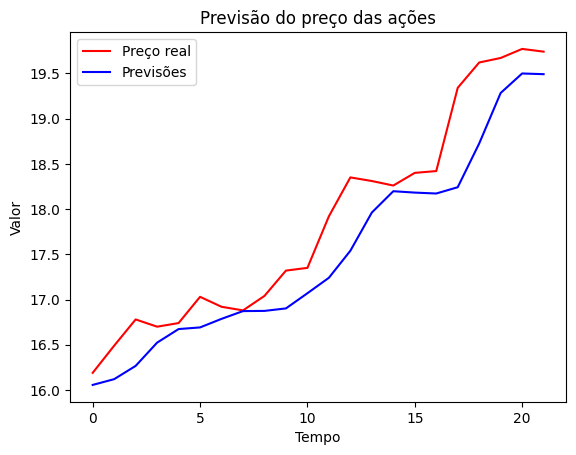

In [73]:
# Plota a série temporal dos preços reais e das previsões:
# - Linha vermelha: preços reais (y_teste)
# - Linha azul: valores previstos pelo modelo (previsoes)
# Ideal para visualizar se o modelo está acompanhando bem a tendência real.
plt.plot(y_teste, color = "red", label = "Preço real")
plt.plot(previsoes, color = "blue", label = "Previsões")
plt.title("Previsão do preço das ações")  # Título do gráfico
plt.xlabel("Tempo")                       # Eixo X = tempo (dias)
plt.ylabel("Valor")                       # Eixo Y = valor das ações em reais
plt.legend();                             # Exibe a legenda das curvas


# “Tô desenhando aqui um gráfico com a linha vermelha mostrando os preços reais e a azul mostrando o que o modelo previu. Assim consigo ver se ele tá seguindo a tendência certa ou viajando.”

## 📊 Avaliação do Modelo

Após o treinamento e a previsão dos preços das ações com a LSTM, foram realizadas comparações quantitativas entre os valores previstos e os valores reais da base de teste. Abaixo, os principais resultados:

### ✅ Médias:
- **Média dos preços previstos**: R$ **17.07**  
- **Média dos preços reais (base de teste)**: R$ **17.87**

> O modelo conseguiu se aproximar bem da média geral, mostrando que ele conseguiu capturar a tendência macro do mercado.

### 📉 Erro Absoluto Médio (MAE):
- **MAE (Mean Absolute Error)**: R$ **0.36**

> Isso significa que, em média, o modelo errou cerca de **36 centavos** por previsão. Para um mercado tão volátil quanto o de ações, esse resultado inicial é bastante promissor.

---

## 📌 Conclusão Final

Apesar da natureza altamente imprevisível do mercado financeiro, o modelo LSTM demonstrou capacidade de **aprender padrões históricos** e **acompanhar tendências de longo prazo**. Com um erro médio relativamente baixo e boa aproximação da média real, este projeto serve como base sólida para evoluções futuras, como:

- Inclusão de mais variáveis (volume, indicadores técnicos, notícias)
- Ajuste de hiperparâmetros
- Teste com outros modelos como GRU ou Transformer

Este foi um excelente primeiro passo na aplicação de Deep Learning para previsão financeira. 🚀📈
